# TesT En Local pour Déployer un modèle dans le cloud


# Sommaire :

**1. Préambule**<br />
&emsp;1.1 Problématique<br />
&emsp;1.2 Objectifs dans ce projet<br />
&emsp;1.3 Déroulement des étapes du projet<br />
**2. Choix techniques généraux retenus**<br />
&emsp;2.1 Calcul distribué<br />
&emsp;2.2 Transfert Learning<br />
**3. Déploiement de la solution en local**<br />
&emsp;3.1 Environnement de travail<br />
&emsp;3.2 Installation de Spark<br />
&emsp;3.3 Installation des packages<br />
&emsp;3.4 Import des librairies<br />
&emsp;3.5 Définition des PATH pour charger les images et enregistrer les résultats<br />
&emsp;3.6 Création de la SparkSession<br />
&emsp;3.7 Traitement des données<br />
&emsp;&emsp;3.7.1 Chargement des données<br />
&emsp;&emsp;3.7.2 Préparation du modèle<br />
&emsp;&emsp;3.7.3 Définition du processus de chargement des images et application <br />
&emsp;&emsp;&emsp;&emsp;&emsp;de leur featurisation à travers l'utilisation de pandas UDF<br />
&emsp;&emsp;3.7.4 Exécution des actions d'extractions de features<br />
&emsp;3.8 Chargement des données enregistrées et validation du résultat<br />


# 1. Préambule

## 1.1 Problématique

La très jeune start-up de l'AgriTech, nommée "**Fruits**!", <br />
cherche à proposer des solutions innovantes pour la récolte des fruits.

La volonté de l’entreprise est de préserver la biodiversité des fruits <br />
en permettant des traitements spécifiques pour chaque espèce de fruits <br />
en développant des robots cueilleurs intelligents.

La start-up souhaite dans un premier temps se faire connaître en mettant <br />
à disposition du grand public une application mobile qui permettrait aux <br />
utilisateurs de prendre en photo un fruit et d'obtenir des informations sur ce fruit.

Pour la start-up, cette application permettrait de sensibiliser le grand public <br />
à la biodiversité des fruits et de mettre en place une première version du moteur <br />
de classification des images de fruits.

De plus, le développement de l’application mobile permettra de construire <br />
une première version de l'architecture **Big Data** nécessaire.

## 1.2 Objectifs dans ce projet

1. Développer une première chaîne de traitement des données qui <br />
   comprendra le **preprocessing** et une étape de **réduction de dimension**.
2. Tenir compte du fait que <u>le volume de données va augmenter <br />
   très rapidement</u> après la livraison de ce projet, ce qui implique de:
 - Déployer le traitement des données dans un environnement **Big Data**
 - Développer les scripts en **pyspark** pour effectuer du **calcul distribué**

## 1.3 Déroulement des étapes du projet

Le projet va être réalisé en 2 temps, dans deux environnements différents. <br />
Nous allons dans un premier temps développer et exécuter notre code en local, <br />
en travaillant sur un nombre limité d'images à traiter.

Une fois les choix techniques validés, nous déploierons notre solution <br />
dans un environnement Big Data en mode distribué.

<u>Pour cette raison, ce projet sera divisé en 3 parties</u>:
1. Liste des choix techniques généraux retenus
2. Déploiement de la solution en local
3. Déploiement de la solution dans le cloud

# 2. Choix techniques généraux retenus

## 2.1 Calcul distribué

L’énoncé du projet nous impose de développer des scripts en **pyspark** <br />
afin de <u>prendre en compte l’augmentation très rapide du volume <br />
de donné après la livraison du projet</u>.

Pour comprendre rapidement et simplement ce qu’est **pyspark** <br />
et son principe de fonctionnement, nous vous conseillons de lire <br />
cet article : [PySpark : Tout savoir sur la librairie Python](https://datascientest.com/pyspark)

<u>Le début de l’article nous dit ceci </u>:<br />
« *Lorsque l’on parle de traitement de bases de données sur python, <br />
on pense immédiatement à la librairie pandas. Cependant, lorsqu’on a <br />
affaire à des bases de données trop massives, les calculs deviennent trop lents.<br />
Heureusement, il existe une autre librairie python, assez proche <br />
de pandas, qui permet de traiter des très grandes quantités de données : PySpark.<br />
Apache Spark est un framework open-source développé par l’AMPLab <br />
de UC Berkeley permettant de traiter des bases de données massives <br />
en utilisant le calcul distribué, technique qui consiste à exploiter <br />
plusieurs unités de calcul réparties en clusters au profit d’un seul <br />
projet afin de diviser le temps d’exécution d’une requête.<br />
Spark a été développé en Scala et est au meilleur de ses capacités <br />
dans son langage natif. Cependant, la librairie PySpark propose de <br />
l’utiliser avec le langage Python, en gardant des performances <br />
similaires à des implémentations en Scala.<br />
Pyspark est donc une bonne alternative à la librairie pandas lorsqu’on <br />
cherche à traiter des jeux de données trop volumineux qui entraînent <br />
des calculs trop chronophages.* »

Comme nous le constatons, **pySpark** est un moyen de communiquer <br />
avec **Spark** via le langage **Python**.<br />
**Spark**, quant à lui, est un outil qui permet de gérer et de coordonner <br />
l'exécution de tâches sur des données à travers un groupe d'ordinateurs. <br />
<u>Spark (ou Apache Spark) est un framework open source de calcul distribué <br />
in-memory pour le traitement et l'analyse de données massives</u>.

Un autre [article très intéressant et beaucoup plus complet pour <br />
comprendre le **fonctionnement de Spark**](https://www.veonum.com/apache-spark-pour-les-nuls/), ainsi que le rôle <br />
des **Spark Session** que nous utiliserons dans ce projet.

<u>Voici également un extrait</u>:

*Les applications Spark se composent d’un pilote (« driver process ») <br />
et de plusieurs exécuteurs (« executor processes »). Il peut être configuré <br />
pour être lui-même l’exécuteur (local mode) ou en utiliser autant que <br />
nécessaire pour traiter l’application, Spark prenant en charge la mise <br />
à l’échelle automatique par une configuration d’un nombre minimum <br />
et maximum d’exécuteurs.*

![Schéma de Spark](img/spark-schema.png)

*Le driver (parfois appelé « Spark Session ») distribue et planifie <br />
les tâches entre les différents exécuteurs qui les exécutent et permettent <br />
un traitement réparti. Il est le responsable de l’exécution du code <br />
sur les différentes machines.

Chaque exécuteur est un processus Java Virtual Machine (JVM) distinct <br />
dont il est possible de configurer le nombre de CPU et la quantité de <br />
mémoire qui lui est alloué. <br />
Une seule tâche peut traiter un fractionnement de données à la fois.*

Dans les deux environnements (Local et Cloud) nous utiliserons donc **Spark** <br />
et nous l’exploiterons à travers des scripts python grâce à **PySpark**.

Dans la <u>version locale</u> de notre script nous **simulerons <br />
le calcul distribué** afin de valider que notre solution fonctionne.<br />
Dans la <u>version cloud</u> nous **réaliserons les opérations sur un cluster de machine**.

## 2.2 Transfert Learning

L'énoncé du projet nous demande également de <br />
réaliser une première chaîne de traitement <br />
des données qui comprendra le preprocessing et <br />
une étape de réduction de dimension.

Il est également précisé qu'il n'est pas nécessaire <br />
d'entraîner un modèle pour le moment.

Nous décidons de partir sur une solution de **transfert learning**.

Simplement, le **transfert learning** consiste <br />
à utiliser la connaissance déjà acquise <br />
par un modèle entraîné (ici **MobileNetV2**) pour <br />
l'adapter à notre problématique.

Nous allons fournir au modèle nos images, et nous allons <br />
<u>récupérer l'avant dernière couche</u> du modèle.<br />
En effet la dernière couche de modèle est une couche softmax <br />
qui permet la classification des images ce que nous ne <br />
souhaitons pas dans ce projet.

L'avant dernière couche correspond à un **vecteur <br />
réduit** de dimension (1,1,1280).

Cela permettra de réaliser une première version du moteur <br />
pour la classification des images des fruits.

**MobileNetV2** a été retenu pour sa <u>rapidité d'exécution</u>, <br />
particulièrement adaptée pour le traitement d'un gros volume <br />
de données ainsi que la <u>faible dimensionnalité du vecteur <br />
de caractéristique en sortie</u> (1,1,1280)

# 3. Déploiement de la solution en local


## 3.1 Environnement de travail

Pour des raisons de simplicité, nous développons dans un environnement <br />
Linux Unbuntu (exécuté depuis une machine Windows dans une machine virtuelle)
* Pour installer une machine virtuelle :  https://www.malekal.com/meilleurs-logiciels-de-machine-virtuelle-gratuits-ou-payants/

## 3.2 Installation de Spark

[La première étape consiste à installer Spark ](https://computingforgeeks.com/how-to-install-apache-spark-on-ubuntu-debian/)

## 3.3 Installation des packages

<u>On installe ensuite à l'aide de la commande **pip** <br />
les packages qui nous seront nécessaires</u> :

In [38]:
#!pip install Pandas pillow tensorflow pyspark pyarrow

## 3.4 Import des librairies

In [39]:
import pandas as pd
from PIL import Image
import numpy as np
import io
import os

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import Model
from pyspark.sql.functions import col, pandas_udf, PandasUDFType, element_at, split
from pyspark.sql import SparkSession


## 3.5 Définition des PATH pour charger les images <br /> et enregistrer les résultats

Dans cette version locale nous partons du principe que les données <br />
sont stockées dans le même répertoire que le notebook.<br />
Nous n'utilisons qu'un extrait de **300 images** à traiter dans cette <br />
première version en local.<br />
L'extrait des images à charger est stockée dans le dossier **Test1**.<br />
Nous enregistrerons le résultat de notre traitement <br />
dans le dossier "**Results_Local**"

In [40]:
PATH = os.getcwd()
PATH_Data = PATH+'/data/Test1'
PATH_Result = PATH+'/data/Results_Local'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data+'\nPATH_Result: '+PATH_Result)

PATH:        /content
PATH_Data:   /content/data/Test1
PATH_Result: /content/data/Results_Local


## 3.6 Création de la SparkSession

L’application Spark est contrôlée grâce à un processus de pilotage (driver process) appelé **SparkSession**. <br />
<u>Une instance de **SparkSession** est la façon dont Spark exécute les fonctions définies par l’utilisateur <br />
dans l’ensemble du cluster</u>. <u>Une SparkSession correspond toujours à une application Spark</u>.

<u>Ici nous créons une session spark en spécifiant dans l'ordre</u> :
 1. un **nom pour l'application**, qui sera affichée dans l'interface utilisateur Web Spark "**P8**"
 2. que l'application doit s'exécuter **localement**. <br />
   Nous ne définissons pas le nombre de cœurs à utiliser (comme .master('local[4]) pour 4 cœurs à utiliser), <br />
   nous utiliserons donc tous les cœurs disponibles dans notre processeur.<br />
 3. une option de configuration supplémentaire permettant d'utiliser le **format "parquet"** <br />
   que nous utiliserons pour enregistrer et charger le résultat de notre travail.
 4. vouloir **obtenir une session spark** existante ou si aucune n'existe, en créer une nouvelle

In [41]:
spark = (SparkSession
             .builder
             .appName('P9')
             .master('local')
             .config("spark.sql.parquet.writeLegacyFormat", 'true')
             .getOrCreate()
)

<u>Nous créons également la variable "**sc**" qui est un **SparkContext** issue de la variable **spark**</u> :

In [42]:
sc = spark.sparkContext

<u>Affichage des informations de Spark en cours d'execution</u> :

In [43]:
spark

## 3.7 Traitement des données

<u>Dans la suite de notre flux de travail, <br />
nous allons successivement</u> :
1. Préparer nos données
    1. Importer les images dans un dataframe **pandas UDF**
    2. Associer aux images leur **label**
    3. Préprocesser en **redimensionnant nos images pour <br />
       qu'elles soient compatibles avec notre modèle**
2. Préparer notre modèle
    1. Importer le modèle **MobileNetV2**
    2. Créer un **nouveau modèle** dépourvu de la dernière couche de MobileNetV2
3. Définir le processus de chargement des images et l'application <br />
   de leur featurisation à travers l'utilisation de pandas UDF
3. Exécuter les actions d'extraction de features
4. Enregistrer le résultat de nos actions
5. Tester le bon fonctionnement en chargeant les données enregistrées




### 3.7.1 Chargement des données

Les images sont chargées au format binaire, ce qui offre, <br />
plus de souplesse dans la façon de prétraiter les images.

Avant de charger les images, nous spécifions que nous voulons charger <br />
uniquement les fichiers dont l'extension est **jpg**.

Nous indiquons également de charger tous les objets possibles contenus <br />
dans les sous-dossiers du dossier communiqué.

In [44]:
images = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(PATH_Data)

<u>Affichage des 5 premières images contenant</u> :
 - le path de l'image
 - la date et heure de sa dernière modification
 - sa longueur
 - son contenu encodé en valeur hexadécimal

<u>Je ne conserve que le **path** de l'image et j'ajoute <br />
    une colonne contenant les **labels** de chaque image</u> :

In [45]:
images = images.withColumn('label', element_at(split(images['path'], '/'),-2))
print(images.printSchema())
print(images.select('path','label').show(5,False))

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)
 |-- label: string (nullable = true)

None
+-----------------------------------------------+-----------+
|path                                           |label      |
+-----------------------------------------------+-----------+
|file:/content/data/Test1/apple_hit_1/r0_115.jpg|apple_hit_1|
|file:/content/data/Test1/apple_hit_1/r0_119.jpg|apple_hit_1|
|file:/content/data/Test1/apple_hit_1/r0_107.jpg|apple_hit_1|
|file:/content/data/Test1/apple_hit_1/r0_143.jpg|apple_hit_1|
|file:/content/data/Test1/apple_hit_1/r0_111.jpg|apple_hit_1|
+-----------------------------------------------+-----------+
only showing top 5 rows

None


### 3.7.2 Préparation du modèle

Je vais utiliser la technique du **transfert learning** pour extraire les features des images.<br />
J'ai choisi d'utiliser le modèle **MobileNetV2** pour sa rapidité d'exécution comparée <br />
à d'autres modèles comme *VGG16* par exemple.

Pour en savoir plus sur la conception et le fonctionnement de MobileNetV2, <br />
je vous invite à lire [cet article](https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c).

<u>Voici le schéma de son architecture globale</u> :

![Architecture de MobileNetV2](img/mobilenetv2_architecture.png)

Il existe une dernière couche qui sert à classer les images <br />
selon 1000 catégories que nous ne voulons pas utiliser.<br />
L'idée dans ce projet est de récupérer le **vecteur de caractéristiques <br />
de dimensions (1,1,1280)** qui servira, plus tard, au travers d'un moteur <br />
de classification à reconnaitre les différents fruits du jeu de données.

Comme d'autres modèles similaires, **MobileNetV2**, lorsqu'on l'utilise <br />
en incluant toutes ses couches, attend obligatoirement des images <br />
de dimension (224,224,3). Nos images étant toutes de dimension (100,100,3), <br />
nous devrons simplement les **redimensionner** avant de les confier au modèle.

<u>Dans l'odre</u> :
 1. Nous chargeons le modèle **MobileNetV2** avec les poids **précalculés** <br />
    issus d'**imagenet** et en spécifiant le format de nos images en entrée
 2. Nous créons un nouveau modèle avec:
  - <u>en entrée</u> : l'entrée du modèle MobileNetV2
  - <u>en sortie</u> : l'avant dernière couche du modèle MobileNetV2

In [46]:
model = MobileNetV2(weights='imagenet',
                    include_top=True,
                    input_shape=(224, 224, 3))

In [47]:
new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)

Affichage du résumé de notre nouveau modèle où nous constatons <br />
que <u>nous récupérons bien en sortie un vecteur de dimension (1, 1, 1280)</u> :

In [48]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

Tous les workeurs doivent pouvoir accéder au modèle ainsi qu'à ses poids. <br />
Une bonne pratique consiste à charger le modèle sur le driver puis à diffuser <br />
ensuite les poids aux différents workeurs.

In [49]:
brodcast_weights = sc.broadcast(new_model.get_weights())

<u>Mettons cela sous forme de fonction</u> :

In [50]:
def model_fn():
    """
    Returns a MobileNetV2 model with top layer removed
    and broadcasted pretrained weights.
    """
    model = MobileNetV2(weights='imagenet',
                        include_top=True,
                        input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
    new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)
    new_model.set_weights(brodcast_weights.value)
    return new_model

### 3.7.3 Définition du processus de chargement des images et application <br/>de leur featurisation à travers l'utilisation de pandas UDF et de la réduction des dimensions PCA

Ce notebook définit la logique par étapes, jusqu'à Pandas UDF.

<u>L'empilement des appels est la suivante</u> :

- Pandas UDF
  - featuriser une série d'images pd.Series
   - prétraiter une image

In [51]:
def nb_composante(dataframe, nb_comp=160):
    '''
    Recherche du nombre de composantes expliquant 95% de la variance
    :param dataframe: Le dataframe d'images
    :param nb_comp: Le nombre de composantes initiales pour l'ACP
    :return: Le nombre de composantes expliquant 95% de la variance totale
    '''

    # Initialisation de l'analyse en composantes principales (ACP)
    pca = PCA(k=nb_comp, inputCol="features_scaled", outputCol="features_pca")

    # Entraînement du modèle PCA
    model_pca = pca.fit(dataframe)

    # Calcul de la variance expliquée
    varexpl = model_pca.explainedVariance * 100

    # Visualisation de la variance expliquée
    plt.figure(figsize=(11, 7))
    plt.bar(np.arange(len(varexpl)) + 1, varexpl)

    # Calcul de la variance cumulée
    cumSumVar = varexpl.cumsum()
    plt.plot(np.arange(len(varexpl)) + 1, cumSumVar, c="red", marker='o')

    # Ligne de référence à 95% de variance expliquée
    plt.axhline(y=95, linestyle="--", color="green", linewidth=1)

    # Recherche du nombre de composantes pour atteindre 95% de variance expliquée
    limit = 95
    min_plans = np.argmax(cumSumVar >= limit) + 1
    plt.axvline(x=min_plans, linestyle="--", color="green", linewidth=1)

    # Configuration de l'axe des x et y
    plt.xlabel("Nombre de composantes principales")
    plt.ylabel("Pourcentage de variance expliquée")
    plt.title("{:.0f}% de la variance totale est expliquée par les {} premiers axes".format(limit, min_plans))
    plt.xticks(np.arange(0, nb_comp + 1, 10))
    plt.xlim(left=0)

    # Affichage du graphique
    plt.show()

    # Retour du nombre de composantes nécessaires pour expliquer 95% de la variance
    return min_plans

In [52]:
def preprocess(content):
    """
    Preprocesses raw image bytes for prediction.
    """
    img = Image.open(io.BytesIO(content)).resize([224, 224])
    arr = img_to_array(img)
    return preprocess_input(arr)

def featurize_series(model, content_series):
    """
    Featurize a pd.Series of raw images using the input model.
    :return: a pd.Series of image features
    """
    input = np.stack(content_series.map(preprocess))
    preds = model.predict(input)
    # For some layers, output features will be multi-dimensional tensors.
    # We flatten the feature tensors to vectors for easier storage in Spark DataFrames.
    output = [p.flatten() for p in preds]
    return pd.Series(output)

@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
    '''
    This method is a Scalar Iterator pandas UDF wrapping our featurization function.
    The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).

    :param content_series_iter: This argument is an iterator over batches of data, where each batch
                              is a pandas Series of image data.
    '''
    # With Scalar Iterator pandas UDFs, we can load the model once and then re-use it
    # for multiple data batches.  This amortizes the overhead of loading big models.
    model = model_fn()
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/functions.py:407: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [53]:
def preprocess_pca(dataframe):
  '''
     Préparation des données :
     - transformation en vecteur dense
     - standardisation
     param : dataframe : dataframe d'images
     return : dataframe avec features vecteur dense standardisé
  '''

  # Préparation des données - conversion des données images en vecteur dense
  transform_vecteur_dense = udf(lambda r: Vectors.dense(r), VectorUDT())
  dataframe = dataframe.withColumn('features_vectors', transform_vecteur_dense('features'))

  # Standardisation obligatoire pour PCA
  scaler_std = StandardScaler(inputCol="features_vectors", outputCol="features_scaled", withStd=True, withMean=True)
  model_std = scaler_std.fit(dataframe)
  # Mise à l'échelle
  dataframe = model_std.transform(dataframe)

  return dataframe

### 3.7.4 Exécution des actions d'extraction de features

Les Pandas UDF, sur de grands enregistrements (par exemple, de très grandes images), <br />
peuvent rencontrer des erreurs de type Out Of Memory (OOM).<br />
Si vous rencontrez de telles erreurs dans la cellule ci-dessous, <br />
essayez de réduire la taille du lot Arrow via 'maxRecordsPerBatch'

Je n'utiliserai pas cette commande dans ce projet <br />
et je laisse donc la commande en commentaire.

In [54]:
#spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "1024")

Nous pouvons maintenant exécuter la featurisation sur l'ensemble de notre DataFrame Spark.<br />
<u>REMARQUE</u> : Cela peut prendre beaucoup de temps, tout dépend du volume de données à traiter. <br />

Notre jeu de données de **Test** contient **22819 images**. <br />
Cependant, dans l'exécution en mode **local**, <br />
nous <u>traiterons un ensemble réduit de **330 images**</u>.

In [55]:
features_df = images.repartition(20).select(col("path"),
                                            col("label"),
                                            featurize_udf("content").alias("features")
                                           )

<u>Rappel du PATH où seront inscrits les fichiers au format "**parquet**" <br />
contenant nos résultats, à savoir, un DataFrame contenant 3 colonnes</u> :
 1. Path des images
 2. Label de l'image
 3. Vecteur de caractéristiques de l'image

In [56]:
print(PATH_Result)

/content/data/Results_Local


<u>Enregistrement des données traitées au format "**parquet**"</u> :

In [57]:
features_df.write.mode("overwrite").parquet(PATH_Result)

**Réduction de dimension PCA**

In [58]:
from pyspark.ml.feature import PCA
from pyspark.sql.functions import udf
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.feature import StandardScaler

In [59]:
# Pré-processing (vecteur dense, standardisation)
df_pca = preprocess_pca(features_df)

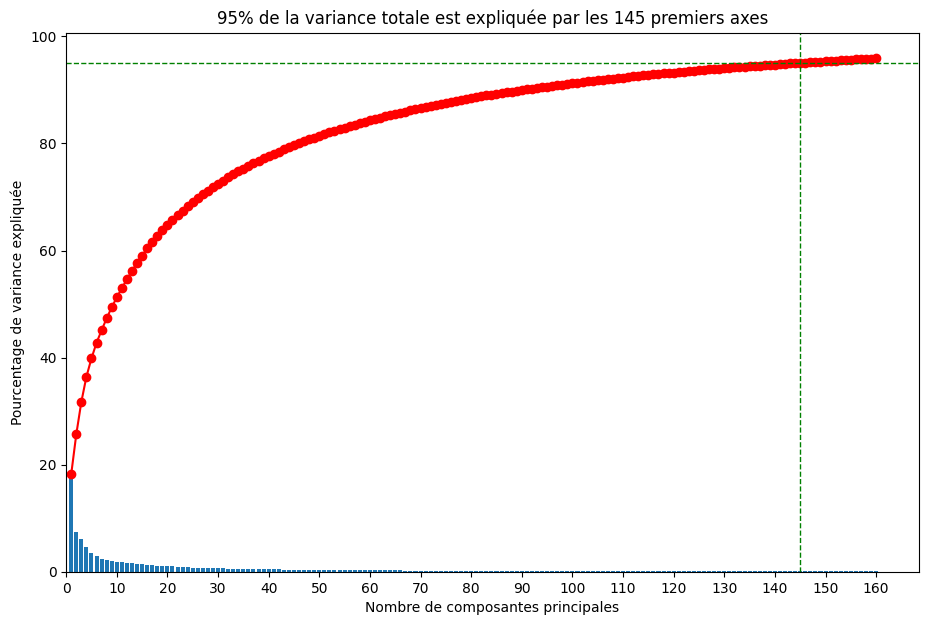

145

In [60]:
# Nombre de composante expliquant 95% de la variance
n_components = nb_composante(df_pca)
n_components

In [61]:

pca = PCA(k=n_components, inputCol='features_scaled', outputCol='features_pca')
model_pca = pca.fit(df_pca)

# Transformation des images sur les k premières composantes
df_reduit = model_pca.transform(df_pca)

In [62]:
# Write the result after PCA to a parquet file
df_reduit.write.mode("overwrite").parquet(PATH_Result + "/pca_results")

In [63]:
print(PATH_Result + "/pca_results")

/content/data/Results_Local/pca_results


## 3.8 Chargement des données enregistrées et validation du résultat

<u>On charge les données fraichement enregistrées dans un **DataFrame Pandas**</u> :

In [64]:
df = pd.read_parquet(PATH_Result, engine='pyarrow')

In [65]:
df_pca=spark.read.parquet(PATH_Result + "/pca_results", engine='pyarrow')

In [66]:
print(df_pca.printSchema())

root
 |-- path: string (nullable = true)
 |-- label: string (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- features_vectors: vector (nullable = true)
 |-- features_scaled: vector (nullable = true)
 |-- features_pca: vector (nullable = true)

None


<u>On affiche les 5 premières lignes du DataFrame</u> :

In [67]:
df.head()

,path,label,features
0,file:/content/data/Test1/apple_hit_1/r0_119.jpg,apple_hit_1,"[0.16603598, 0.49976552, 1.47335, 0.0, 0.48897..."
1,file:/content/data/Test1/apple_hit_1/r0_135.jpg,apple_hit_1,"[0.28270292, 0.36120224, 1.448914, 0.0, 0.0, 0..."
2,file:/content/data/Test1/apple_hit_1/r0_175.jpg,apple_hit_1,"[0.076977, 0.4396123, 1.1265556, 0.0, 0.010518..."
3,file:/content/data/Test1/apple_hit_1/r1_55.jpg,apple_hit_1,"[0.018150378, 0.062381968, 1.0725708, 0.0, 0.2..."
4,file:/content/data/Test1/apple_hit_1/r1_51.jpg,apple_hit_1,"[0.041539505, 0.11278817, 1.5329193, 0.0, 0.25..."


In [68]:
df_pca

DataFrame[path: string, label: string, features: array<float>, features_vectors: vector, features_scaled: vector, features_pca: vector]

<u>On valide que la dimension du vecteur de caractéristiques des images est bien de dimension 1280</u> :

In [69]:
df.loc[0,'features'].shape

(1280,)

In [70]:
# Sélectionner la colonne "pca_features" et la renommer en "features"
df_pca_features = df_pca.select(col("features_pca").alias("features"))

# Récupérer la première ligne du DataFrame
first_row = df_pca_features.first()

# Obtenir la dimension de la colonne "features"
dimension = len(first_row["features"])
print("Dimension après réduction PCA:", dimension)

Dimension après réduction PCA: 145


In [71]:
df_pca.columns

['path',
 'label',
 'features',
 'features_vectors',
 'features_scaled',
 'features_pca']

In [72]:
df_pca.count()

394

**Bilan** :
Nous venons de valider le processus sur un jeu de données allégé en local  <br />
où nous avons simulé un cluster de machines en répartissant la charge de travail <br />
sur différents cœurs de processeur au sein d'une même machine. Sur ce test en local, nous avons mis en place la réduction de dimension avec PCA

Nous allons maintenant généraliser le processus en déployant notre solution <br />
sur un réel cluster de machines dans le notebook deploiement cloud et nous travaillerons désormais sur la totalité <br />
des 22819 images de notre dossier "Test".